In [145]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [146]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [147]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [148]:
print(data.corr()['y'])
print(data.corr()['f1'])
print(data.corr()['f2'])
print(data.corr()['f3'])

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64
f1    1.000000
f2    0.065468
f3    0.123589
y     0.067172
Name: f1, dtype: float64
f1    0.065468
f2    1.000000
f3   -0.055561
y    -0.017944
Name: f2, dtype: float64
f1    0.123589
f2   -0.055561
f3    1.000000
y     0.839060
Name: f3, dtype: float64


In [149]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [150]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# Task 1


**1**

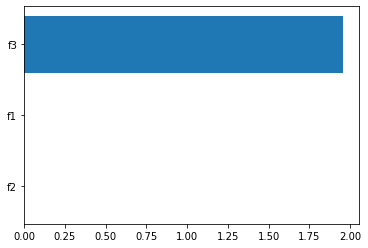

[[-8.89638113e-04  1.04169461e-05  1.95668016e+00]]


In [169]:
#Showing feature importance by plotting the coefficient values.
def feature_importances(coef, names):
    imp = abs(coef)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    #Took help from here to plot the feature importance https://stackoverflow.com/a/41601281

clf = LogisticRegression(random_state = 42)
clf.fit(X, Y)
feature_names = data.drop(['y'],axis=1).columns
feature_importances(clf.coef_[0],feature_names)

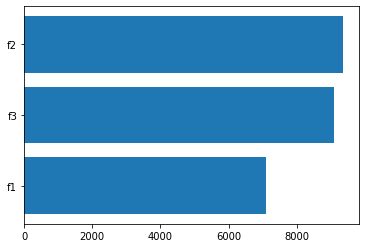

[[-7107.3738991   9364.07983619  9088.73593971]]


In [186]:
svm_model = SGDClassifier(loss='hinge',random_state=42)
svm_model.fit(X,Y)
feature_importances(svm_model.coef_[0],feature_names)
print(svm_model.coef_)

# Observation

1. As more the weights coresponding to the feature is more its impact upon deciding the hyper-plane is more.


2. According to the co-effiecients of logistic regression , feature 3 i.e f3 has the highest weight(1.959). Thus is the most important feature, followed by f1 and finally f2. It seems feature 2 has no role in LR model.


3. However, the case is entirely different with SVM based model. As feature 2 is the most important feature having the maximum weight (9364.08) here,followed by f3 and then f1. But according to SVM all the features are having a decent weight in deciding the hyperplane unlike the LR model.

# Task 2

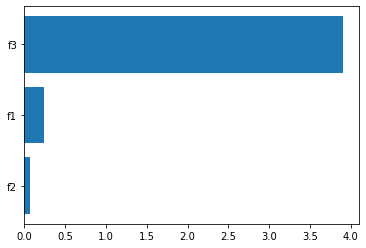

In [179]:
#Logistic Regression

X_ = data.drop(['y'],axis=1)#we want to only standardize the features not the response value. so creating X_ with just the features
standardized_X = (X_-np.mean(X_))/np.std(X_)
clf.fit(standardized_X, Y)
feature_importances(clf.coef_[0],feature_names)

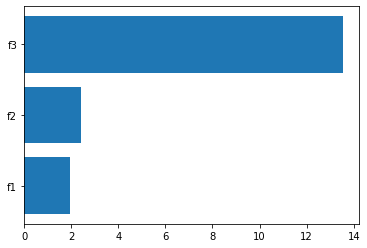

In [180]:
#SVM

svm_model.fit(standardized_X,Y)
feature_importances(svm_model.coef_[0],feature_names)

# Observation

1. After performing standarization on the 3 features and then applying LR model, it is observed feature 3 shows more weight as compared to other i.e 3.8(approx).


2. On a similar note, SVM after standardizing results to show that feature 3 is most important for similar reason that is f3 has high weigh for the coefficient of the weight vector(13.7)

